https://www.kaggle.com/code/islembenmaalem/music-classification-random-state-42

In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import seaborn as sns

In [18]:
data = pd.read_csv("../feature_extraction/dataForHarmonicAudio.csv",usecols=lambda column: column != 'filename')

In [28]:
data.shape

(1000, 45)

In [19]:
data.head()

,chroma_C,chroma_Csharp,chroma_D,chroma_Dsharp,chroma_E,chroma_F,chroma_Fsharp,chroma_G,chroma_Gsharp,chroma_A,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,genre
0,0.391512,0.429697,0.524729,0.385698,0.366340,0.433856,0.445597,0.593311,0.438685,0.413015,...,0.164212,2.695709,1.318642,0.632315,0.957001,-1.566437,6.275709,7.807974,6.363476,pop
1,0.544175,0.420254,0.424198,0.399732,0.300949,0.312941,0.363381,0.445987,0.342582,0.325424,...,5.130442,6.827752,3.071533,3.366904,-2.422404,-2.135466,-3.336569,-0.564991,-3.893568,pop
2,0.344232,0.477342,0.461315,0.383294,0.430534,0.360271,0.595679,0.406584,0.354102,0.464613,...,1.111607,-2.048577,-4.366745,-3.732610,-3.398216,2.417332,1.289159,7.578645,4.909898,pop
3,0.392071,0.428158,0.523789,0.385555,0.366227,0.433113,0.444056,0.591267,0.437267,0.413407,...,0.235207,2.670471,1.338333,0.699207,1.112011,-1.565463,6.195435,7.648764,6.243628,pop
4,0.396111,0.442692,0.408399,0.486187,0.353345,0.326342,0.372000,0.300399,0.334868,0.334352,...,-0.269821,-1.642580,-4.781828,-3.302547,-4.714705,-3.559506,-3.702941,-4.042264,0.333003,pop


In [20]:
X = data.iloc[:, :-1]  # the last column is the label
y = data.iloc[:, -1]  # the label

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

In [22]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
columns = list(range(X.shape[1]))
data_in_columns = X.iloc[:, columns]

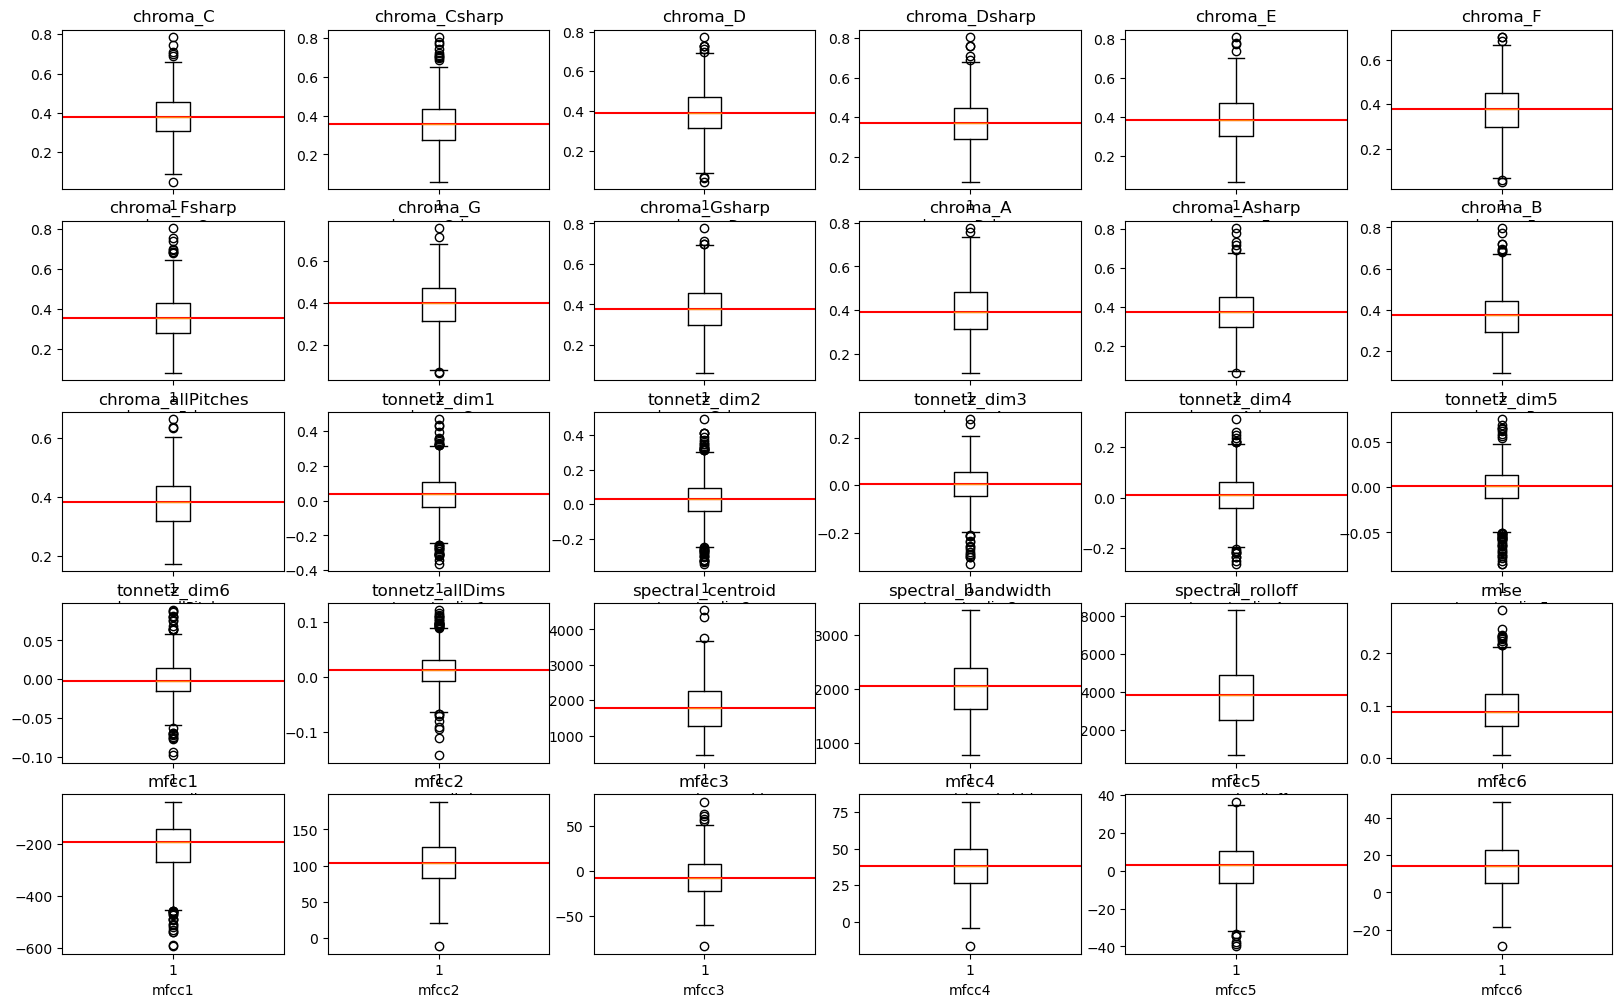

In [24]:
fig, axes = plt.subplots(nrows=5, ncols=6, figsize=(20, 12))

for i, ax in enumerate(axes.flat):
    if i < len(columns):
        ax.boxplot(data_in_columns.iloc[:, i])
        ax.set_title(f'{data_in_columns.columns[i]}')
        ax.axhline(y=data_in_columns.iloc[:, i].median(), color='r')
        ax.set_xlabel(data_in_columns.columns[i])
    else:
        ax.set_visible(False)


plt.show()

In [26]:
thresholds = data_in_columns.quantile([0.25, 0.75])
iqr = 1.5 * (thresholds.loc[0.75] - thresholds.loc[0.25])

dataWithoutOutliers = data.copy()

for col in data_in_columns.columns:
    lower = thresholds.loc[0.25, col] - iqr.loc[col]
    upper = thresholds.loc[0.75, col] + iqr.loc[col]
    dataWithoutOutliers[col] = np.where((dataWithoutOutliers[col] < lower) | (dataWithoutOutliers[col] > upper), np.nan, dataWithoutOutliers[col])

dataWithoutOutliers = dataWithoutOutliers.dropna()

In [27]:
dataWithoutOutliers.shape

(740, 45)

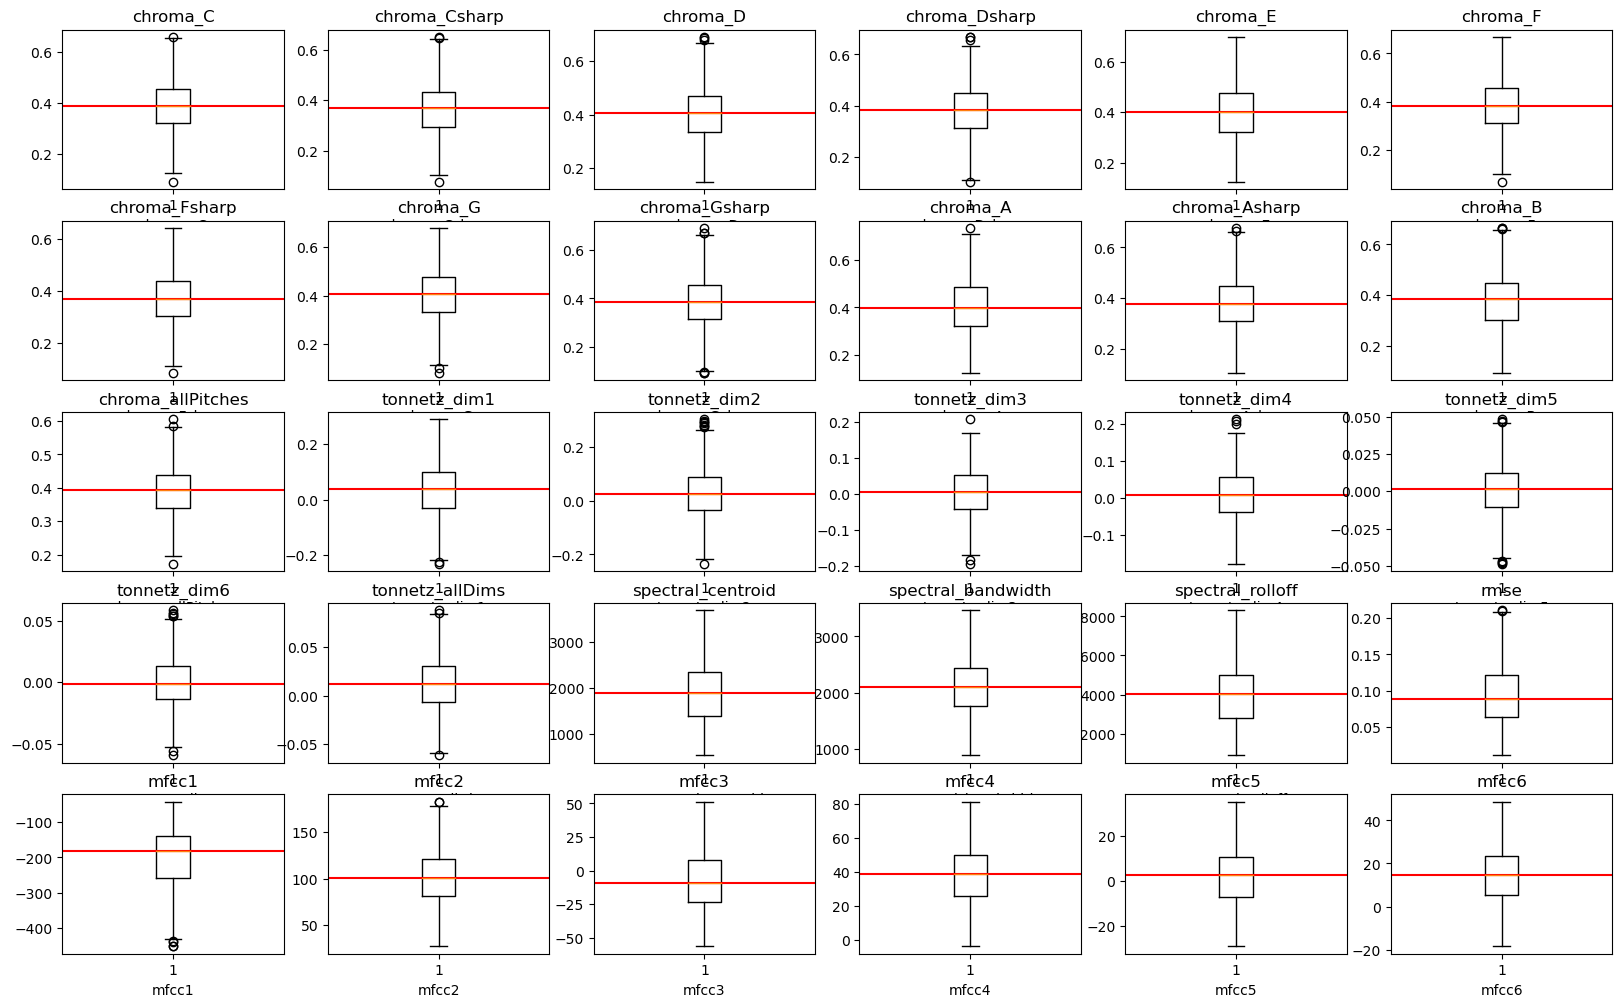

In [29]:
X = dataWithoutOutliers.iloc[:, :-1]
y = dataWithoutOutliers.iloc[:, -1]

columns = list(range(X.shape[1]))
data_in_columns = X.iloc[:, columns]

fig, axes = plt.subplots(nrows=5, ncols=6, figsize=(20, 12))

for i, ax in enumerate(axes.flat):
    if i < len(columns):
        ax.boxplot(data_in_columns.iloc[:, i])
        ax.set_title(f'{data_in_columns.columns[i]}')
        ax.axhline(y=data_in_columns.iloc[:, i].median(), color='r')
        ax.set_xlabel(data_in_columns.columns[i])
    else:
        ax.set_visible(False)


plt.show()

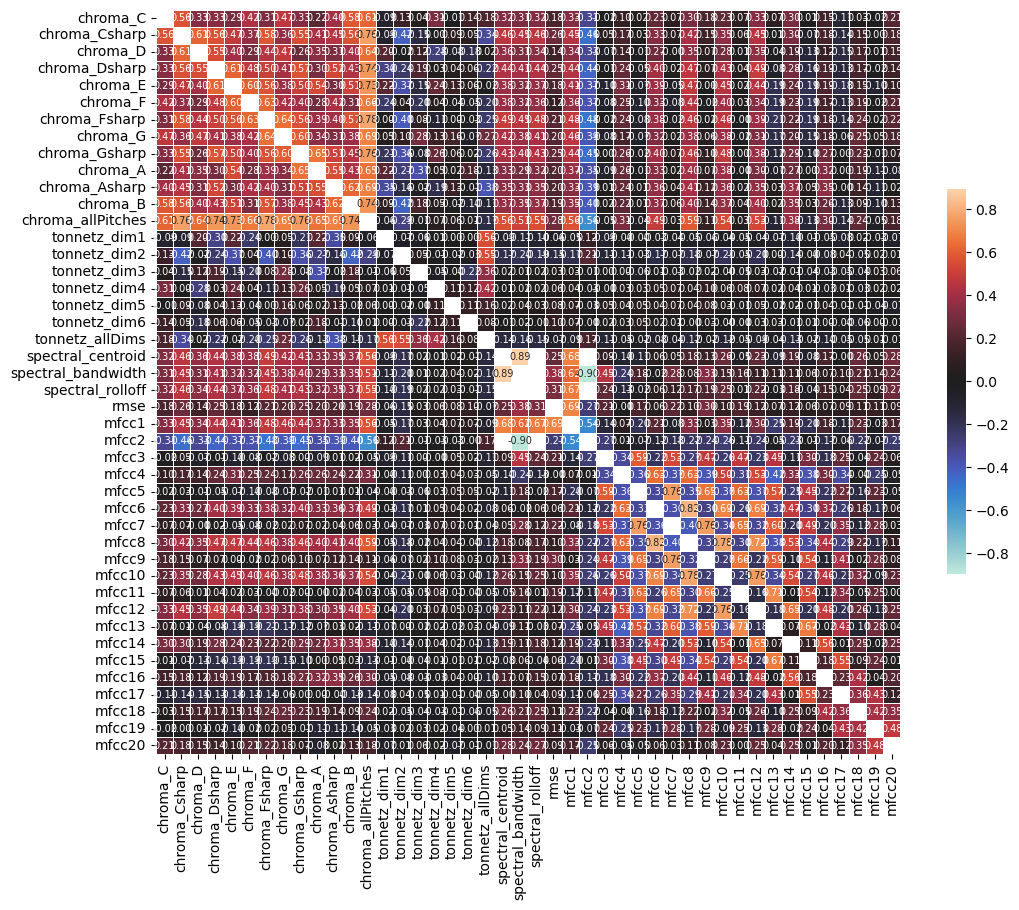

In [37]:
corr = X.corr()

mask = corr.abs() > 0.9

plt.figure(figsize=(12,10))

sns.heatmap(corr, center=0, mask=mask, square=True, linewidths=.4, annot=True, fmt=".2f", annot_kws={"size": 7}, cbar_kws={"shrink": .5})
plt.show()

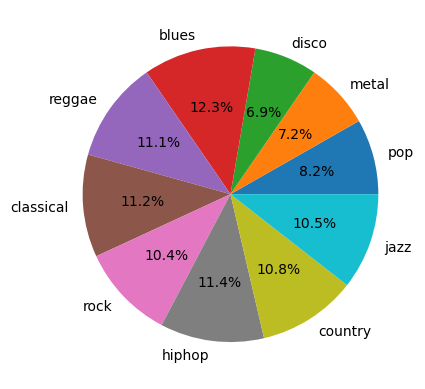

In [56]:
labels = [
    'pop',
    'metal',
    'disco',
    'blues',
    'reggae',
    'classical',
    'rock',
    'hiphop',
    'country',
    'jazz'
]

sizes = np.unique(y,return_counts=True)[1]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')

plt.show()

In [57]:
mappingGenresToIntegers = {
    'pop': 0,
    'metal': 1,
    'disco': 2,
    'blues': 3,
    'reggae': 4,
    'classical': 5,
    'rock': 6,
    'hiphop': 7,
    'country': 8,
    'jazz': 9
}

dfWithGenresMappedToInts = dataWithoutOutliers.copy()
dfWithGenresMappedToInts['genre'] = dfWithGenresMappedToInts['genre'].map(mappingGenresToIntegers)

dfWithGenresMappedToInts.head()

,chroma_C,chroma_Csharp,chroma_D,chroma_Dsharp,chroma_E,chroma_F,chroma_Fsharp,chroma_G,chroma_Gsharp,chroma_A,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,genre
0,0.391512,0.429697,0.524729,0.385698,0.366340,0.433856,0.445597,0.593311,0.438685,0.413015,...,0.164212,2.695709,1.318642,0.632315,0.957001,-1.566437,6.275709,7.807974,6.363476,0
1,0.544175,0.420254,0.424198,0.399732,0.300949,0.312941,0.363381,0.445987,0.342582,0.325424,...,5.130442,6.827752,3.071533,3.366904,-2.422404,-2.135466,-3.336569,-0.564991,-3.893568,0
2,0.344232,0.477342,0.461315,0.383294,0.430534,0.360271,0.595679,0.406584,0.354102,0.464613,...,1.111607,-2.048577,-4.366745,-3.732610,-3.398216,2.417332,1.289159,7.578645,4.909898,0
3,0.392071,0.428158,0.523789,0.385555,0.366227,0.433113,0.444056,0.591267,0.437267,0.413407,...,0.235207,2.670471,1.338333,0.699207,1.112011,-1.565463,6.195435,7.648764,6.243628,0
4,0.396111,0.442692,0.408399,0.486187,0.353345,0.326342,0.372000,0.300399,0.334868,0.334352,...,-0.269821,-1.642580,-4.781828,-3.302547,-4.714705,-3.559506,-3.702941,-4.042264,0.333003,0


In [58]:
dfWithGenresMappedToInts.shape

(740, 45)

In [59]:
X = dfWithGenresMappedToInts.iloc[:, :-1] 
y = dfWithGenresMappedToInts.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

In [60]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Train score :  0.8696343402225755
Test score :  0.6486486486486487


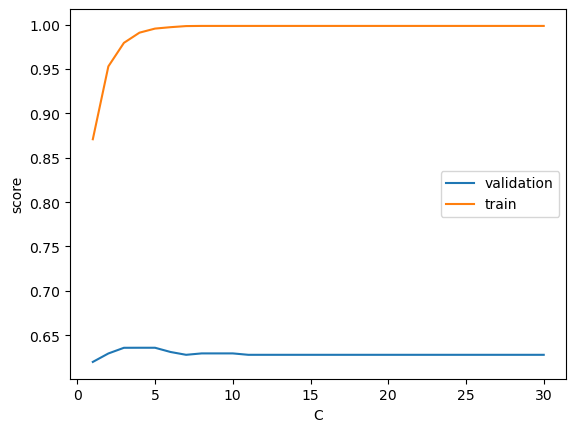

In [64]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, validation_curve, RandomizedSearchCV
model_svm = SVC()

model_svm.fit(X_train, y_train)
print('Train score : ', model_svm.score(X_train,y_train))
print('Test score : ', model_svm.score(X_test,y_test))

k_3 = np.arange(1,31)

train_score_3, val_score_3 = validation_curve(model_svm, X_train, y_train, cv=10, param_name='C', param_range=k_3, scoring='accuracy')

train = model_svm.predict(X_train)
predictions = model_svm.predict(X_test)

plt.plot(k_3, val_score_3.mean(axis = 1), label = 'validation')
plt.plot(k_3, train_score_3.mean(axis = 1), label = 'train')

plt.ylabel('score')
plt.xlabel('C')

plt.legend()

In [66]:
genres = pd.Categorical(data.loc[:,'genre']).categories
print(genres)

Index(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal',
       'pop', 'reggae', 'rock'],
      dtype='object')


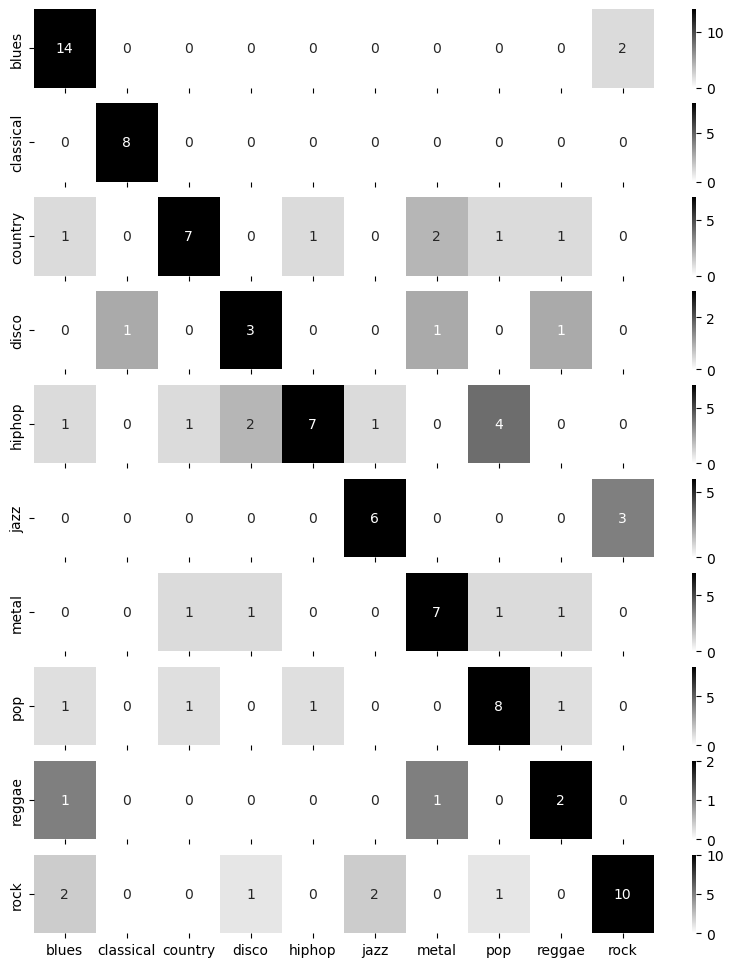

In [70]:
from sklearn.metrics import confusion_matrix

fig, axs = plt.subplots(10, figsize=(10,12), sharex=True)

y_pred = model_svm.predict(X_test)

conf_mat = confusion_matrix(y_test, y_pred)

for i in range(10):    
    sns.heatmap(conf_mat[i].reshape(1,-1), annot=True, cmap='gray_r',xticklabels=genres, yticklabels=[genres[i]], ax=axs[i])
plt.show()


In [73]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, recall_score

print("Precision : ",accuracy_score(y_test, y_pred))
print("Recall : ", recall_score(y_test, y_pred, average = 'macro'))
print("F1-Score : ", f1_score(y_test, y_pred, average = 'macro'))

Precision :  0.6486486486486487
Recall :  0.6445658508158508
F1-Score :  0.6289972548023864


Train score : 0.6883942766295708
Test score : 0.5675675675675675


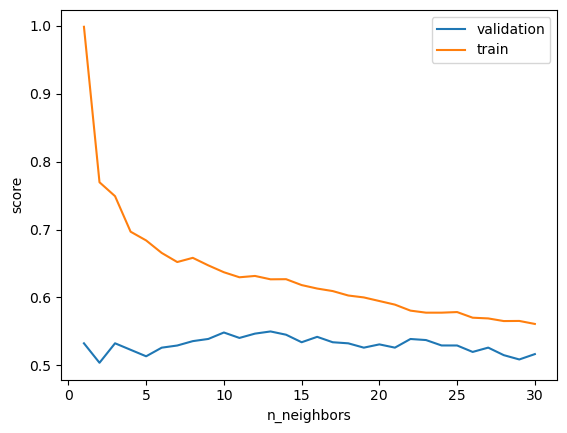

In [74]:
model_knn = KNeighborsClassifier()

model_knn.fit(X_train, y_train)
print('Train score :', model_knn.score(X_train,y_train))
print('Test score :', model_knn.score(X_test,y_test))

k_1 = np.arange(1, 31)
train_score_1, val_score_1 = validation_curve(model_knn, X_train, y_train, cv=10, param_name='n_neighbors', param_range=k_1, scoring='accuracy')


plt.plot(k_1, val_score_1.mean(axis = 1), label = 'validation')
plt.plot(k_1, train_score_1.mean(axis = 1), label = 'train')

plt.ylabel('score')
plt.xlabel('n_neighbors')
plt.legend()

In [ ]:
#Printing rfc gridsearchcv results in table
'''
# création du modèle
rf = RandomForestClassifier(random_state = 42, bootstrap=True)

# grid search
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train, y_train)

pd_res = pd.concat([pd.DataFrame(grid_search.cv_results_["params"]),pd.DataFrame(grid_search.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
pd_res = pd_res.sort_values('Accuracy', ascending=False)
pd_res.head(5)


'''

In [75]:
#Displaying rfc feature importaance in bar chart results in table

'''
plt.style.use('fivethirtyeight')

importances = list(rf.feature_importances_)

x_values = list(range(len(importances)))
plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, list(data_clean.columns).remove('label'), rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances')

'''

"\nplt.style.use('fivethirtyeight')\n\nimportances = list(rf.feature_importances_)\n\nx_values = list(range(len(importances)))\nplt.bar(x_values, importances, orientation = 'vertical')\nplt.xticks(x_values, list(data_clean.columns).remove('label'), rotation='vertical')\nplt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances')\n\n"

In [ ]:
clf = XGBClassifier(objective= 'multi:softprob', random_state = 42)
print('Parameters currently in use:\n')
pprint(clf.get_params())

random_grid = {
    "colsample_bylevel" : [1],
    "colsample_bytree" : [1],
    "gamma"            : [0], 
    "max_delta_step" : [0],
    "max_depth"        : [10, None], 
    "min_child_weight" : [1], 
    "n_estimators" : [100, 200, 300, 400, 500], 
    "subsample" : [0.8]}


# création du modèle
clf = XGBClassifier(objective= 'multi:softprob', random_state = 42)

# random search
clf_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=0, n_jobs = -1)

# fit le modèle
clf_random.fit(X_train, y_train)

pd_res = pd.concat([pd.DataFrame(clf_random.cv_results_["params"]),pd.DataFrame(clf_random.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
pd_res = pd_res.sort_values('Accuracy', ascending=False)
pd_res.head(5)





param_grid = {
    "learning_rate" : [0.1], #d0.3
    "max_depth"        : [10], #d6
    "n_estimators" : [150, 200, 250, 300,400], #d100
    "subsample" : [0.8], #d1
}

pprint(param_grid)


# création du modèle
clf = XGBClassifier(objective= 'multi:softprob', random_state = 0)

grid = GridSearchCV(clf, param_grid = param_grid, n_jobs=-1, scoring="accuracy", cv=3) #scoring="neg_log_loss"
grid.fit(X_train, y_train)

pd_res = pd.concat([pd.DataFrame(grid.cv_results_["params"]),pd.DataFrame(grid.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
pd_res = pd_res.sort_values('Accuracy', ascending=False)
pd_res.head(5)